In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Dataset shape:", X.shape)
print("\nTarget distribution:")
print(y.value_counts())
print("\n0: Malignant, 1: Benign")

Dataset shape: (569, 30)

Target distribution:
target
1    357
0    212
Name: count, dtype: int64

0: Malignant, 1: Benign


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 455
Test set size: 114


In [4]:
# Train Logistic Regression model (linear classifier)
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9890
Test Accuracy: 0.9825


In [5]:
# Detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=['Malignant', 'Benign']))


Classification Report (Test Set):
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



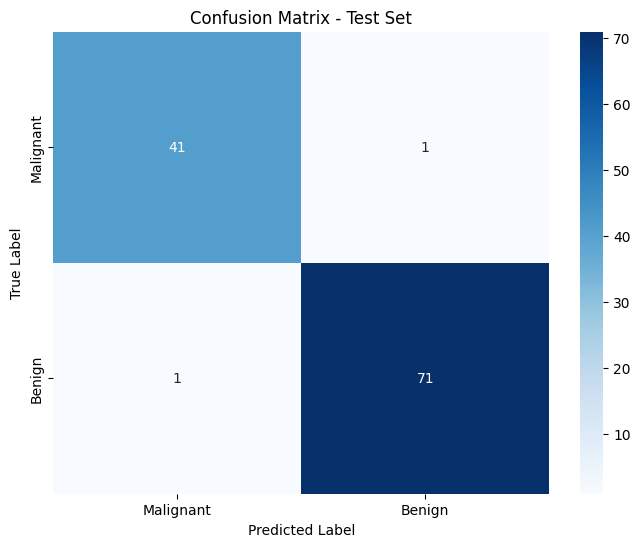

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

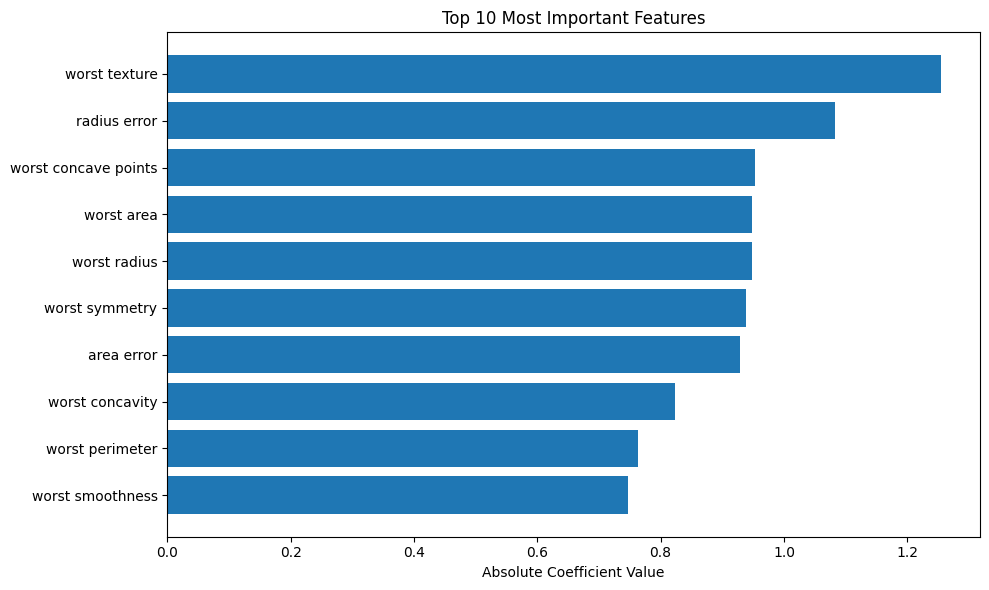


Top 10 Most Important Features:
                 feature  importance
21         worst texture    1.255088
10          radius error    1.082965
27  worst concave points    0.953686
23            worst area    0.947756
20          worst radius    0.947616
28        worst symmetry    0.939181
13            area error    0.929104
26       worst concavity    0.823151
22       worst perimeter    0.763220
24      worst smoothness    0.746625


In [7]:
# Feature importance - Top 10 most important features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_[0])
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))